# Подготовили студенты Пинкевич А., Яковлева С., Старченко К.


Логистическая регрессия — это разновидность множественной регрессии, общее назначение которой состоит в анализе связи между несколькими независимыми переменными (называемыми также регрессорами или предикторами) и зависимой переменной. Бинарная логистическая регрессия применяется в случае, когда зависимая переменная является бинарной (т.е. может принимать только два значения). С помощью логистической регрессии можно оценивать вероятность того, что событие наступит для конкретного испытуемого (больной/здоровый, возврат кредита/дефолт и т.д.).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/MatchTimelinesFirst15.csv')
df.head(15) #наши данные

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0
5,5,3.494459e+09,1,25470.0,362.0,82.0,9.2,22856.0,319.0,86.0,8.8,9.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0
6,6,3.463321e+09,1,25391.0,350.0,96.0,9.2,23236.0,345.0,80.0,8.6,8.0,2.0,0.0,0.0,5.0,1.0,0.0,1.0
7,7,3.463280e+09,0,28946.0,367.0,65.0,9.2,26528.0,311.0,63.0,8.8,15.0,2.0,0.0,1.0,14.0,1.0,0.0,1.0
8,8,3.462719e+09,1,26928.0,379.0,80.0,9.6,23065.0,362.0,95.0,9.2,11.0,1.0,0.0,0.0,5.0,2.0,0.0,1.0
9,9,3.462734e+09,1,26079.0,302.0,106.0,9.0,27275.0,347.0,91.0,9.4,9.0,1.0,0.0,1.0,10.0,2.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   redGold                  48651 non-null  float64
 5   redMinionsKilled         48651 non-null  float64
 6   redJungleMinionsKilled   48651 non-null  float64
 7   blueChampKills           48651 non-null  float64
 8   blueHeraldKills          48651 non-null  float64
 9   blueTowersDestroyed      48651 non-null  float64
 10  redChampKills            48651 non-null  float64
 11  redHeraldKills           48651 non-null  float64
 12  redTowersDestroyed       48651 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 4.8 MB


In [ ]:
#убираем  столбики с ID матча,  а также с номером по порядку.
df = df.drop(['matchId','Unnamed: 0'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   blueAvgLevel             48651 non-null  float64
 5   redGold                  48651 non-null  float64
 6   redMinionsKilled         48651 non-null  float64
 7   redJungleMinionsKilled   48651 non-null  float64
 8   redAvgLevel              48651 non-null  float64
 9   blueChampKills           48651 non-null  float64
 10  blueHeraldKills          48651 non-null  float64
 11  blueDragonKills          48651 non-null  float64
 12  blueTowersDestroyed      48651 non-null  float64
 13  redChampKills            48651 non-null  float64
 14  redHeraldKills        

In [ ]:
#видим, что-что не так с redDragonKills и blueDragonKills, посмотрев таблицу понимаем, что в связи с механикой игры эти строчки остаются пустыми
#Также убираем redAvgLevel и blueAvgLevel
df = df.drop(['redDragonKills','blueDragonKills','redAvgLevel','blueAvgLevel'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   redGold                  48651 non-null  float64
 5   redMinionsKilled         48651 non-null  float64
 6   redJungleMinionsKilled   48651 non-null  float64
 7   blueChampKills           48651 non-null  float64
 8   blueHeraldKills          48651 non-null  float64
 9   blueTowersDestroyed      48651 non-null  float64
 10  redChampKills            48651 non-null  float64
 11  redHeraldKills           48651 non-null  float64
 12  redTowersDestroyed       48651 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 4.8 MB


In [ ]:
y = df['blue_win'] # целевая переменная

In [ ]:
X = df.drop('blue_win', axis = 1) # признаки

Логистическая модель в sklearn реализована в классе LogisticRegression библиотеки linear_model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l1',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1e4,
    # параметр для остановки поиска решения.(прекращается процесс обучения когда приближаемся к локальному минимому равному переменной tol)
    tol=1e-4,
    # Так как распознается 2 класса. 
    multi_class='ovr'
    )

In [ ]:
model.fit(X, y)

LogisticRegression(C=10000.0, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
preds = model.predict(X) #предсказанные значения

In [ ]:
#Матрица ошибок
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y, preds)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,18871,5191
1,5155,19434


Ошибки есть, но в целом оба класса предсказывают неплохо. Есть вариант как-то поиграться еще с предобработкой данных, но пока оставим как есть

In [ ]:
pred_prob = model.predict_proba(X) #выдает результат в виде вероятности

In [ ]:
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
#frp - false positive rate (горизонтальная ось)
#tpr (recall) - true positive rate (вертикальная ось)
# каждая точка на графике ROC AUC соответствует выбору некоторого порога (про это ниже)

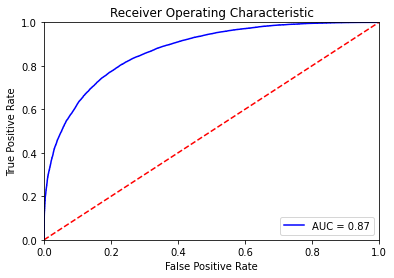

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Результаты применения L1 и L2
penalty='l2' C=1 AUC = 0.87

penalty='l2' C=1e2 AUC = 0.87

penalty='l2' C=1e4 AUC = 0.87

penalty='l1' C=1 AUC = 0.87

penalty='l1' C=1e2 AUC = 0.87

penalty='l1' C=1e4 AUC = 0.87


In [ ]:
#посмотрим на наши признаки
model.coef_

array([[ 3.50339677e-07, -4.36613617e-11,  2.58130101e-04,
         2.63683253e-03,  4.02078440e-03,  4.96511192e-01,
        -2.30699753e-04, -3.22999724e-03, -5.80983380e-03,
        -5.19203532e-01,  6.22911554e-02,  1.77303398e-01,
         0.00000000e+00, -4.30469721e-03, -7.31025201e-02,
        -1.91661771e-01,  0.00000000e+00, -6.35655518e-02]])

In [ ]:
len(model.coef_[0])

18

In [ ]:
# для наглядности сделаем все в словаре, тк после удаления можем потерять нумерацию столбцов
col = [i for i in range(18)]
listValues = model.coef_[0]
myDict = {col[i]:listValues[i] for i in range(0, len(col), 1)} 
for key in myDict:
    print(key, '->', myDict[key])

0 -> 3.503396773686147e-07
1 -> -4.366136169632876e-11
2 -> 0.0002581301010670769
3 -> 0.0026368325293171634
4 -> 0.004020784401689255
5 -> 0.49651119237353203
6 -> -0.00023069975266142568
7 -> -0.0032299972425599258
8 -> -0.005809833800267175
9 -> -0.519203532373366
10 -> 0.06229115543027149
11 -> 0.17730339837260906
12 -> 0.0
13 -> -0.004304697211075088
14 -> -0.07310252011017879
15 -> -0.19166177113251776
16 -> 0.0
17 -> -0.06356555180839957


In [ ]:
# если значения признака меньше 0.01 удалим его (считаем их близкими к нулю)
key_new = list()
for key in myDict:
    if myDict[key] < 0.01:
        key_new.append(key)
print(key_new) # номера столбцов которые мы будем удалять для метода ближайших соседей

[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17]


In [ ]:
df1 = pd.read_csv('/content/MatchTimelinesFirst15.csv')

In [ ]:
c = df.columns

In [ ]:
for i in key_new:
     df1.drop([c[i]], axis = 1, inplace = True)

In [ ]:
df1.info()
#видим что все поля числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueJungleMinionsKilled  48651 non-null  float64
 1   redAvgLevel              48651 non-null  float64
 2   blueChampKills           48651 non-null  float64
 3   redTowersDestroyed       48651 non-null  float64
dtypes: float64(4)
memory usage: 1.5 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор
clf = KNeighborsClassifier(n_neighbors=3)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
clf.score(X_test, y_test)

0.5674586861793965